# Credit Risk Modelling – Enhanced Probability of Default (PD)

1. **Setup & Libraries**  
   Import Python libraries for data handling, modelling, and evaluation (including SMOTE for class balancing).

2. **Generate Mock Data**  
   Create a synthetic loan dataset with features such as age, income, loan amount, and a default indicator.

3. **Train-Test Split**  
   Split the dataset into training and testing sets, preserving class balance.

4. **Imbalance Handling (SMOTE)**  
   Apply Synthetic Minority Over-sampling Technique (SMOTE) to balance the training dataset.

5. **Logistic Regression Model**  
   Train a logistic regression model on the resampled dataset.

6. **Model Evaluation**  
   - Confusion Matrix and Accuracy  
   - Classification Report (precision, recall, F1)  
   - ROC AUC, PR AUC, and KS Statistic  
   - Threshold analysis to compare precision–recall trade-offs  

7. **Visualisation**  
   - Histogram of predicted PD probabilities  
   - Distribution of customers by risk level

In [23]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.random.seed(16) # Fixed seed for reproducibility
n = 1000

In [25]:
age = np.random.randint(21, 65, size=n)
income = np.random.normal(75000, 15000, n)
loan_amount = np.random.normal(50000, 15000, n)
default = np.random.binomial(1, 0.1, n)

In [ ]:
# Dataframe with mock loan data
# Includes:
#   - Normally distributed loan amounts and income
#   - Random ages between 21 and 65
#   - A 10% chance of defaulting
df = pd.DataFrame({
    'age' : np.random.randint(21, 65, size=n),
    'income' : np.random.normal(75000, 15000, n),
    'loan_amount' : np.random.normal(50000, 15000, n),
    'default' : np.random.binomial(1, 0.1, n)
})

In [ ]:
# Split data into features (X) and target variables (y)
X = df[['age', 'income', 'loan_amount']]
y = df['default']

In [ ]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=16
)

In [ ]:
# Fix class imbalance
smote = SMOTE(random_state=16)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=2000, random_state=16)
model.fit(X_train_resampled, y_train_resampled)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
# Make prefictions on test data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[100  79]
 [ 12   9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.56      0.69       179
           1       0.10      0.43      0.17        21

    accuracy                           0.55       200
   macro avg       0.50      0.49      0.43       200
weighted avg       0.81      0.55      0.63       200

Accuracy Score: 0.545


In [ ]:
# Create a results DataFrame with predictions 
result_df = X_test.copy()
result_df['Actual_Default'] = y_test.values
result_df['Predicted_Default'] = y_pred
result_df['PD_Probability'] = y_prob
result_df['Status'] = result_df['Predicted_Default'].apply(lambda x: 'Default' if x == 1 else 'Not Default')

print("\n Sample Predictions:")
print(result_df.head(10))


 Sample Predictions:
     age        income  ...  PD_Probability       Status
707   51  80792.138984  ...        0.466236  Not Default
667   37  68678.588595  ...        0.546193      Default
740   25  66243.892994  ...        0.649531      Default
939   58  80547.598055  ...        0.411518  Not Default
278   57  94829.751377  ...        0.528281      Default
327   43  75945.882769  ...        0.446733  Not Default
628   44  87589.267233  ...        0.477877  Not Default
221   34  81100.119874  ...        0.466054  Not Default
227   30  80954.906606  ...        0.631373      Default
767   30  84313.720498  ...        0.529057      Default

[10 rows x 7 columns]


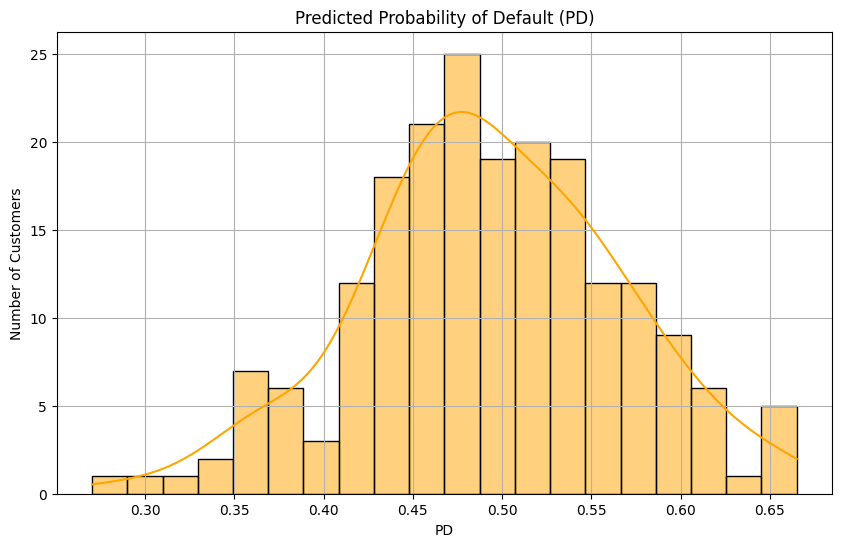

In [ ]:
# Visualise the predicted PD probabilities
plt.figure(figsize=(10, 6))
sns.histplot(result_df['PD_Probability'], bins=20, kde=True, color='orange')
plt.title('Predicted Probability of Default (PD)')
plt.xlabel('PD')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()